In [1]:
from NuPyCEE import omega as o
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from NuPyCEE import stellab as b

## 1. STELLAB (Stellar Abundances)

Launched the STELLAB without input parameter

In [2]:
s=b.stellab()

Select the galaxy and then print the chemical abundance. 

(-1.6, 1.6)

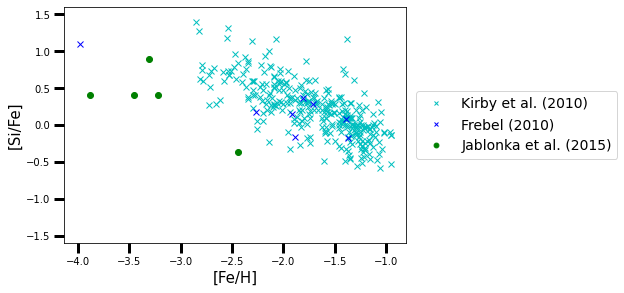

In [3]:
g='sculptor'
s.plot_spectro(galaxy=g,xaxis='[Fe/H]',yaxis='[Si/Fe]')
plt.ylim(-1.6,1.6)

In this part, they use the data of the galaxy sculptor.

## 2. Fornax and OMEGA - Fitting Mg abundances

In omega, using the parameter galaxy will set the appropriate star formation history extracted from observations. Here we use the Fornax SFH from Boer et al.(2012). In the plot, they use the [Fe/H] to present the metallicity.

In [4]:
g='fornax'
o_scl=o.omega(galaxy=g,mgal=1e9)

OMEGA run in progress..
   OMEGA run completed - Run time: 0.7s


(-3.2, 0.2)

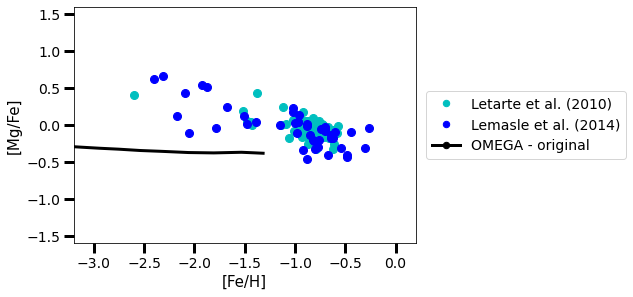

In [5]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=2,galaxy=g,xaxis=x,yaxis=y)

o_scl.plot_spectro(fig=2,xaxis=x,yaxis=y,label='OMEGA - original')

plt.legend(loc='center left',bbox_to_anchor=(1.01,0.5),markerscale=0.8, fontsize=14)
plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

From the plot we can see that the mimic is not very good. The range of the metallicity of the simulation is not enough and in its predict range, the prediction is not right. In this part, we try to fit the simulation to the observation data.

### 2.1 Initial mass of gas

First, try to reproduce the data at low metallicity.

(-1.6, 1.6)

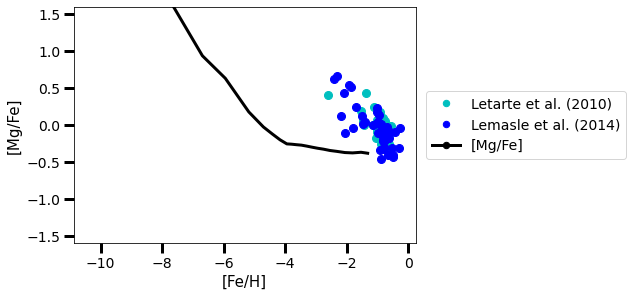

In [6]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=3,galaxy=g,xaxis=x,yaxis=y)

o_scl.plot_spectro(fig=3,xaxis=x,yaxis=y)

plt.legend(loc='center left', bbox_to_anchor=(1.01,0.5),markerscale=0.8, fontsize=14)
           
plt.ylim(-1.6,1.6)

Change the initial mass can shift the axis of the [Fe/H]. So first try to set the initial mass of gas.

In [7]:
o_scl_1e7=o.omega(galaxy=g, mgal=1e7)

OMEGA run in progress..
Warning -- Not enough gas to sustain the SFH. 27
Warning -- Not enough gas to sustain the SFH. 28
Warning -- Not enough gas to sustain the SFH. 29
Warning -- Not enough gas to sustain the SFH. 30
   OMEGA run completed - Run time: 0.73s


(-3.2, 0.2)

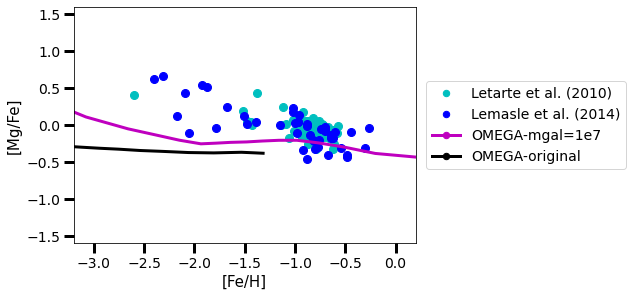

In [8]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=4,galaxy=g,xaxis=x,yaxis=y)

o_scl_1e7.plot_spectro(fig=4,xaxis=x,yaxis=y,color='m',label='OMEGA-mgal=1e7')
o_scl.plot_spectro(fig=4,xaxis=x,yaxis=y,color='k',label='OMEGA-original')

#plt.legend(loc='center left',bbox_to_anchor=(1.01,0.5),markerscale=0.8,fontsize=1.4)
plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

### 2.2 Galactic inflows for sustaining the SFH

In the former simulation, the gas will use out in the end. Introduce the inflow to the galaxy may help to solve this problem.

In [9]:
o_scl_sfe_03=o.omega(galaxy=g,SF_law=True,sfe=0.03)
o_scl_sfe_30=o.omega(galaxy=g,SF_law=True,sfe=0.30)

OMEGA run in progress..
   OMEGA run completed - Run time: 0.76s
OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.9s


(-3.2, 0.2)

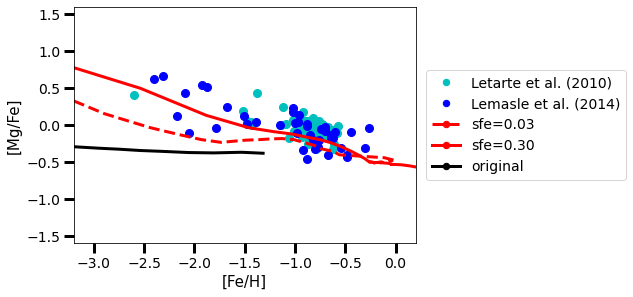

In [10]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=5,galaxy=g,xaxis=x,yaxis=y)

o_scl_sfe_03.plot_spectro(fig=5,xaxis=x,yaxis=y,color='r',shape='--',label='sfe=0.03')
o_scl_sfe_30.plot_spectro(fig=5,xaxis=x,yaxis=y,color='r',label='sfe=0.30')
o_scl.plot_spectro(fig=5,xaxis=x,yaxis=y,color='k',label='original')

plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

In the plot we can find that the red solid line is more fittable.

### 2.3 Galactic outflows for intensifying the gas circulation

In the SF_law=True mode, we can use the mass_loading factor to set the stregth of galactic ourflows. Increasing the mass_loading parameter, the galaxy will eject more metal and introduce more gas, so the final [Fe/H] value will decrease.

In [11]:
o_scl_ml_2=o.omega(galaxy=g,SF_law=True,sfe=0.3,mass_loading=2.0)
o_scl_ml_4=o.omega(galaxy=g,SF_law=True,sfe=0.3,mass_loading=4.0)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.91s
OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.9s


(-3.2, 0.2)

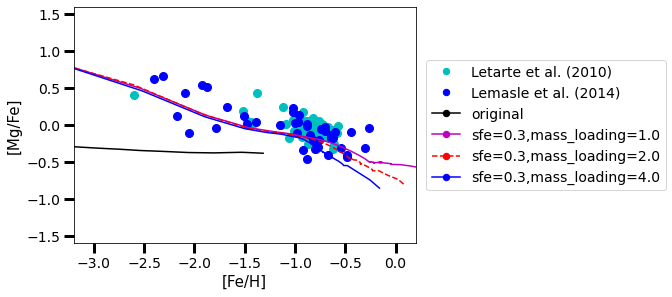

In [12]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=6,galaxy=g,xaxis=x,yaxis=y)

o_scl.plot_spectro(fig=6,xaxis=x,yaxis=y,color='k',label='original',linewidth=1.5)
o_scl_sfe_30.plot_spectro(fig=6,xaxis=x,yaxis=y,color='m',label='sfe=0.3,mass_loading=1.0',linewidth=1.5)
o_scl_ml_2.plot_spectro(fig=6,xaxis=x,yaxis=y,color='r',shape='--',label='sfe=0.3,mass_loading=2.0',linewidth=1.5)
o_scl_ml_4.plot_spectro(fig=6,xaxis=x,yaxis=y,color='b',label='sfe=0.3,mass_loading=4.0',linewidth=1.5)

plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

From the former plot, we can find that the mass_loading=2.0 is more fittable. After setting the mass_loading factor, we can set the ratio of the super nova Ia.

In [13]:
o_scl_1a_4=o.omega(galaxy=g,SF_law=True, sfe=0.30, mass_loading=2.0, nb_1a_per_m=0.4e-3)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.95s


(-3.2, 0.2)

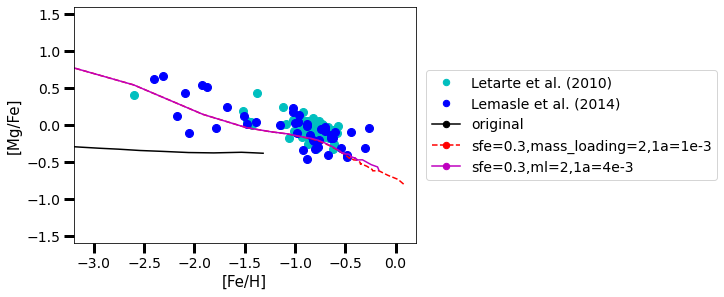

In [14]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=7,galaxy=g,xaxis=x,yaxis=y)

o_scl.plot_spectro(fig=7,xaxis=x,yaxis=y,color='k',label='original',linewidth=1.5)
o_scl_ml_2.plot_spectro(fig=7,xaxis=x,yaxis=y,color='r',shape='--',label='sfe=0.3,mass_loading=2,1a=1e-3',linewidth=1.5)
o_scl_1a_4.plot_spectro(fig=7,xaxis=x,yaxis=y,color='m', label='sfe=0.3,ml=2,1a=4e-3',linewidth=1.5)

plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

The transitionmass of the massive stars will change the ejecta too.

In [15]:
o_scl_tm_10=o.omega(galaxy=g,SF_law=True, sfe=0.30, mass_loading=2.0, 
                    nb_1a_per_m=0.4e-3, transitionmass=10)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.96s


(-3.2, 0.2)

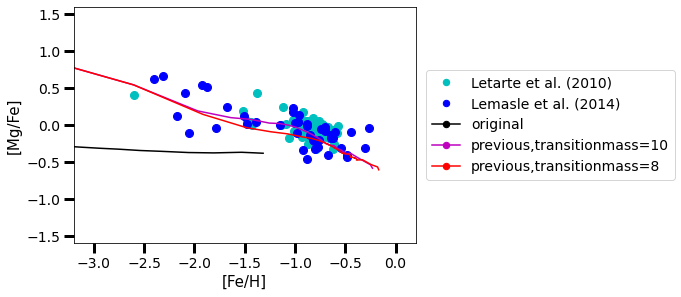

In [16]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=8,galaxy=g,xaxis=x,yaxis=y)

o_scl.plot_spectro(fig=8,xaxis=x,yaxis=y,color='k',label='original',linewidth=1.5)
o_scl_tm_10.plot_spectro(fig=8,xaxis=x,yaxis=y,color='m',linewidth=1.5,label='previous,transitionmass=10')
o_scl_1a_4.plot_spectro(fig=8,xaxis=x,yaxis=y,color='r',linewidth=1.5, label='previous,transitionmass=8')

plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

### 2.4 The importance of investigating many elements simultaneously

Now we will consider more elements to fit the parameters.

(-3.2, 0.2)

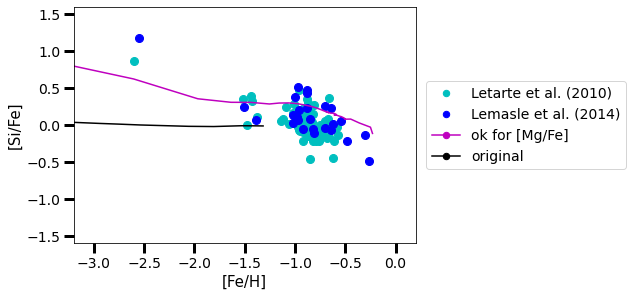

In [17]:
y='[Si/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=9,galaxy=g,xaxis=x,yaxis=y)

o_scl_tm_10.plot_spectro(fig=9,xaxis=x,yaxis=y,linewidth=1.5,color='m',label='ok for [Mg/Fe]')
o_scl.plot_spectro(fig=9,xaxis=x,yaxis=y,linewidth=1.5,label='original')

plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

Then they try to find out the most fittable parameter for Si abudance.

In [18]:
o_scl_Si=o.omega(galaxy=g,SF_law=True,sfe=0.3,mass_loading=6,
                nb_1a_per_m=1.5e-3,transitionmass=10)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.81s


(-3.2, 0.2)

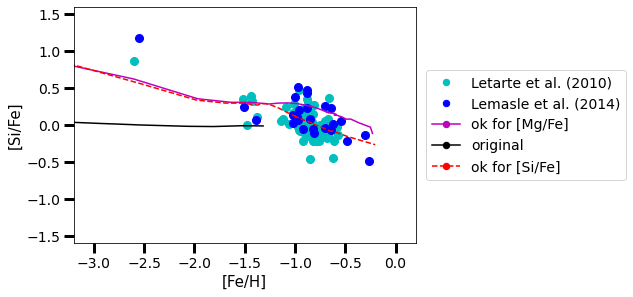

In [22]:
y='[Si/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=10,galaxy=g,xaxis=x,yaxis=y)

o_scl_tm_10.plot_spectro(fig=10,xaxis=x,yaxis=y,linewidth=1.5,color='m',label='ok for [Mg/Fe]')
o_scl.plot_spectro(fig=10,xaxis=x,yaxis=y,linewidth=1.5,label='original')
o_scl_Si.plot_spectro(fig=10,xaxis=x,yaxis=y,linewidth=1.5,label='ok for [Si/Fe]',color='r',shape='--')

plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

See how the 'ok for [Si/Fe] perform in [Mg/Fe]

(-3.2, 0.2)

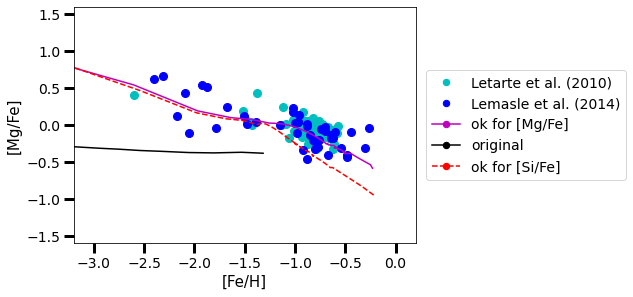

In [23]:
y='[Mg/Fe]'
x='[Fe/H]'

s.plot_spectro(fig=11,galaxy=g,xaxis=x,yaxis=y)

o_scl_tm_10.plot_spectro(fig=11,xaxis=x,yaxis=y,linewidth=1.5,color='m',label='ok for [Mg/Fe]')
o_scl.plot_spectro(fig=11,xaxis=x,yaxis=y,linewidth=1.5,label='original')
o_scl_Si.plot_spectro(fig=11,xaxis=x,yaxis=y,linewidth=1.5,label='ok for [Si/Fe]',color='r',shape='--')

plt.ylim(-1.6,1.6)
plt.xlim(-3.2,0.2)

From this contrast we can find that, in the simulation of the galactic chemical evolution, the most important thing is to include many elements, and a good simulation is that all the elements can be fit well.